# Énoncé du projet :
##### Le but de ce projet est d’exploiter les méthodes d’apprentissage automatique pour analyser des  données issues d’un ensemble de banques afin qu’une banque soit en mesure de prendre des décisions d’emprunt d’argent aux  demandeurs en fonction de leurs caractéristiques (prédire l'éligibilité au prêt  en fonction des détails du client). L’ensemble des informations de l’emprunt d’argent d’un ensemble de  banques est répertorié dans le fichier Loan.csv.

## Partie A

##### Importer tous les packages 

In [132]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import graphviz
from IPython.display import Image

##### 1. Afficher les informations sur les données de ce dataset :

In [133]:
data = pd.read_csv('Loan.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


##### 2. Afficher le calcul des opérations statistiques de base :

In [134]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598,598,598,586.000000,598,598,598.000000,598.000000,577.000000,584.000000,549.000000,598,598
unique,598,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,487,388,NaN,465,488,NaN,NaN,NaN,NaN,NaN,225,411
mean,NaN,NaN,NaN,0.755973,NaN,NaN,5292.252508,1631.499866,144.968804,341.917808,0.843352,NaN,NaN
std,NaN,NaN,NaN,1.007751,NaN,NaN,5807.265364,2953.315785,82.704182,65.205994,0.363800,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3806.000000,1211.500000,127.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,1.750000,NaN,NaN,5746.000000,2324.000000,167.000000,360.000000,1.000000,NaN,NaN


##### 3. Remplacer chaque valeur nulle (NaN) :

In [135]:
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

non_numeric_cols = data.select_dtypes(exclude='number').columns
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

##### 4. Proposer une fonction pour encoder les valeurs non numériques :

In [136]:
label_encoders = {}
for col in non_numeric_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


##### 5. Supprimer les colonnes inutiles :

In [137]:
columns_to_drop = ['Loan_ID']
data.drop(columns=columns_to_drop, inplace=True)


##### 6. Afficher la nouvelle dimension de l’ensemble de données et leurs types :

In [138]:
print(data.shape)
data.dtypes

(598, 12)


Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

##### 7. Afficher le calcul des opérations statistiques de la nouvelle version :

In [139]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.814381,0.648829,0.755973,0.222408,0.183946,5292.252508,1631.499866,144.968804,341.917808,0.843352,1.038462,0.687291
std,0.389124,0.477736,0.997572,0.416212,0.387765,5807.265364,2953.315785,81.236564,64.436899,0.348551,0.789499,0.463985
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3806.000000,1211.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5746.000000,2324.000000,163.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,2.000000,1.000000


##### 8. Tester les méthodes de classification :

In [140]:
X, y = data.drop('Loan_Status', axis=1), data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Création des modèles
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC()
dt = DecisionTreeClassifier()

# Entraînement des modèles
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Prédiction des classes des données de test
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)



##### 9. Utiliser des métriques d'évaluation telles que la précision, le rappel, etc :

In [141]:
# Évaluation des modèles
print('KNN :', accuracy_score(y_test, y_pred_knn))
print('SVM :', accuracy_score(y_test, y_pred_svm))
print('Decision Tree :', accuracy_score(y_test, y_pred_dt))


KNN : 0.6
SVM : 0.6933333333333334
Decision Tree : 0.7533333333333333


##### 10. Programmer la fonction de classification :

In [142]:
def classifier_loan(data):
    X, y = data.drop('Loan_Status', axis=1), data['Loan_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_true=y_test, y_pred=y_pred))
    return y_pred

predictions = classifier_loan(data)

              precision    recall  f1-score   support

           0       0.50      0.57      0.53        35
           1       0.81      0.76      0.79        85

    accuracy                           0.71       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.72      0.71      0.71       120



## Partie B : Visualisation des résultats

##### 1. Le revenu du demandeur en fonction du sexe et de la situation civile (Married) :

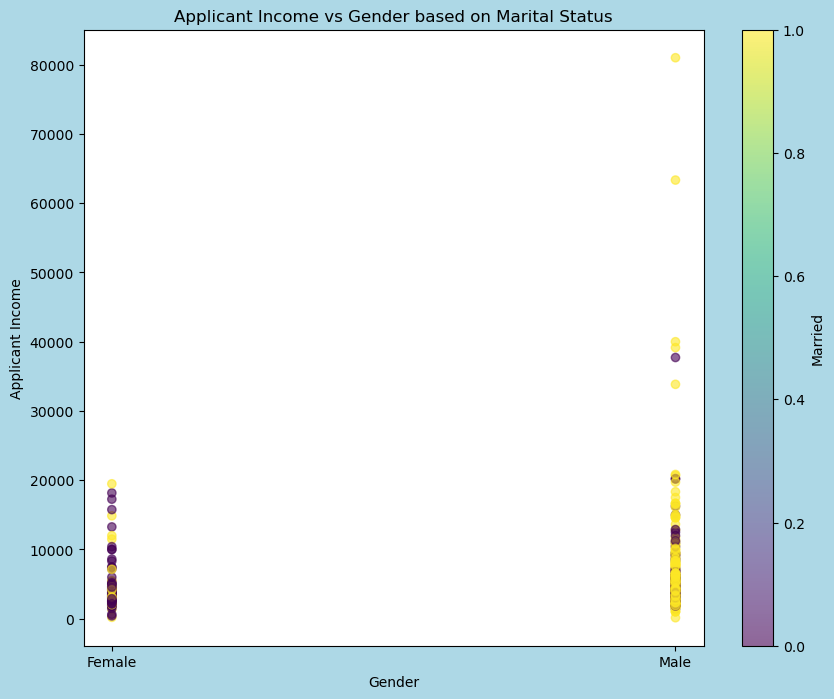

In [143]:
plt.figure(figsize=(10, 8), facecolor='lightblue', alpha=0.6)
# Création d'un nuage de points (scatter plot)
plt.scatter(
    data['Gender'],  # Données pour l'axe des x (Genre)
    data['ApplicantIncome'],  # Données pour l'axe des y (Revenu du demandeur)
    c=data['Married'],  # Couleur basée sur l'état matrimonial
    cmap='viridis',  # Utilisation d'une colormap 'viridis'
    alpha=0.6  # Réglage de la transparence des points
)

plt.xlabel('Gender')  # Étiquette de l'axe x (Genre)
plt.ylabel('Applicant Income')  # Étiquette de l'axe y (Revenu du demandeur)
plt.title('Applicant Income vs Gender based on Marital Status')  # Titre du graphique

plt.colorbar(label='Married')  # Ajout d'une barre de couleur indiquant l'état matrimonial
plt.xticks([0, 1], ['Female', 'Male'])  # Remplacement des marques de l'axe x par 'Female' et 'Male'
plt.show()  # Affichage du graphique


##### 2. Le revenu du demandeur en fonction du sexe et du niveau d’éducation :

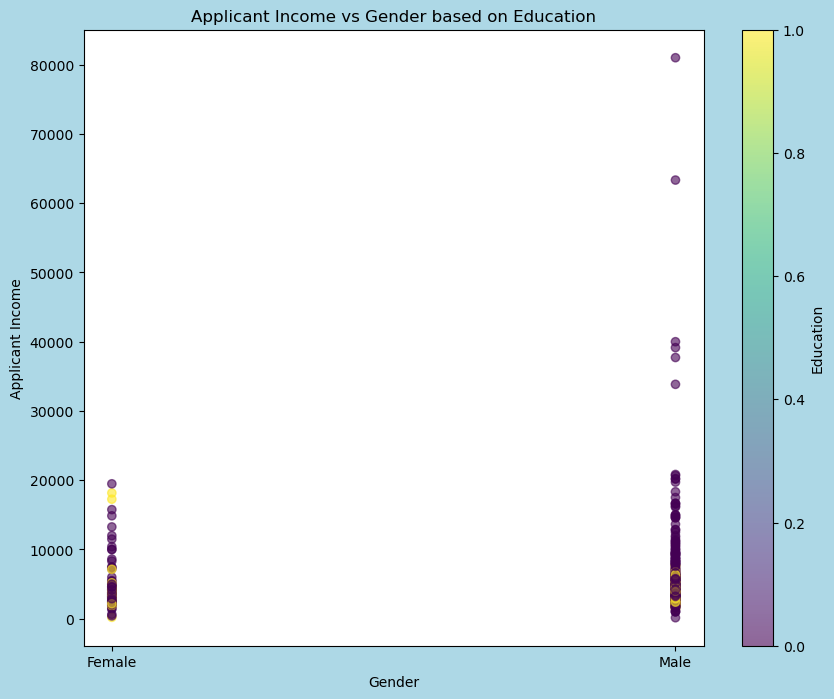

In [144]:
plt.figure(figsize=(10, 8), facecolor='lightblue', alpha=0.6)
# Création d'un nuage de points (scatter plot)
plt.scatter(
    data['Gender'],  # Données pour l'axe des x (Genre)
    data['ApplicantIncome'],  # Données pour l'axe des y (Revenu du demandeur)
    c=data['Education'],  # Couleur basée sur le niveau d'éducation
    cmap='viridis',  # Utilisation d'une colormap 'viridis'
    alpha=0.6  # Réglage de la transparence des points
)

plt.xlabel('Gender')  # Étiquette de l'axe x (Genre)
plt.ylabel('Applicant Income')  # Étiquette de l'axe y (Revenu du demandeur)
plt.title('Applicant Income vs Gender based on Education')  # Titre du graphique

plt.colorbar(label='Education')  # Ajout d'une barre de couleur indiquant le niveau d'éducation
plt.xticks([0, 1], ['Female', 'Male'])  # Remplacement des marques de l'axe x par 'Female' et 'Male'
plt.show()  # Affichage du graphique



##### 3. Le revenu du demandeur en fonction de la situation civile et du niveau d’éducation :

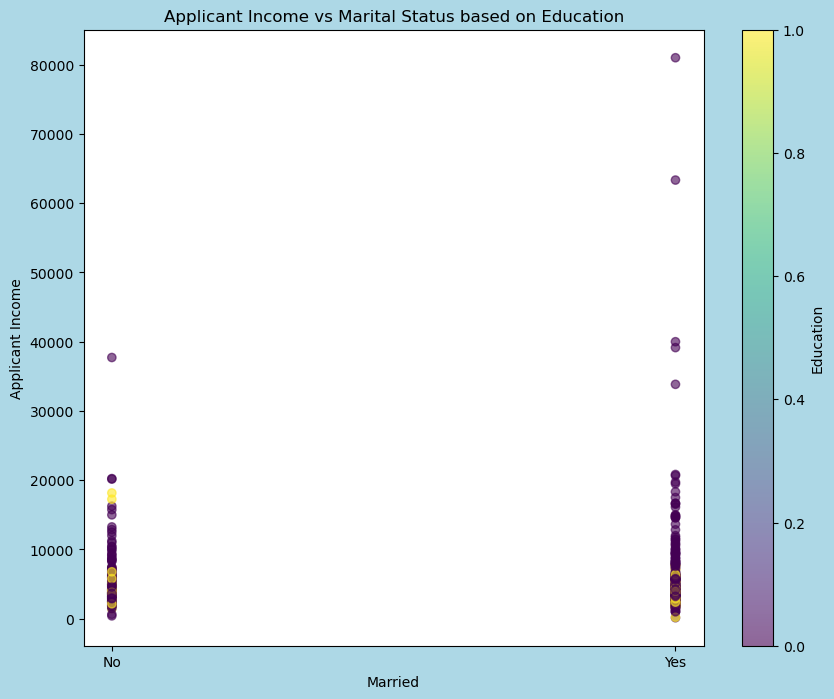

In [145]:
plt.figure(figsize=(10, 8), facecolor='lightblue', alpha=0.6)
# Création d'un nuage de points (scatter plot)
plt.scatter(
    data['Married'],  # Données pour l'axe des x (État matrimonial)
    data['ApplicantIncome'],  # Données pour l'axe des y (Revenu du demandeur)
    c=data['Education'],  # Couleur basée sur le niveau d'éducation
    cmap='viridis',  # Utilisation d'une colormap 'viridis'
    alpha=0.6  # Réglage de la transparence des points
)

plt.xlabel('Married')  # Étiquette de l'axe x (État matrimonial)
plt.ylabel('Applicant Income')  # Étiquette de l'axe y (Revenu du demandeur)
plt.title('Applicant Income vs Marital Status based on Education')  # Titre du graphique

plt.colorbar(label='Education')  # Ajout d'une barre de couleur indiquant le niveau d'éducation
plt.xticks([0, 1], ['No', 'Yes'])  # Remplacement des marques de l'axe x par 'No' et 'Yes'
plt.show()  # Affichage du graphique

##### 4. Le revenu du demandeur en fonction du type de travail (Self_Employed) :

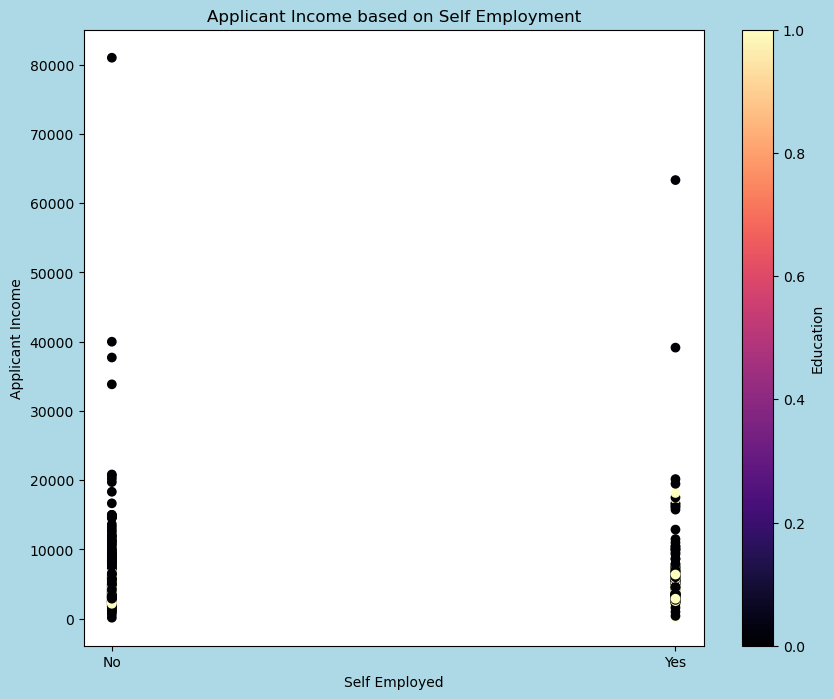

In [146]:
plt.figure(figsize=(10, 8), facecolor='lightblue', alpha=0.6)
plt.scatter(data['Self_Employed'], data['ApplicantIncome'], c=data['Education'], cmap='magma')
plt.xlabel('Self Employed')
plt.ylabel('Applicant Income')
plt.title('Applicant Income based on Self Employment')
plt.xticks([0, 1], ['No', 'Yes'])
plt.colorbar(label='Education')
plt.show()


##### 5. Le revenu du demandeur en fonction du nombre de personnes à charge :

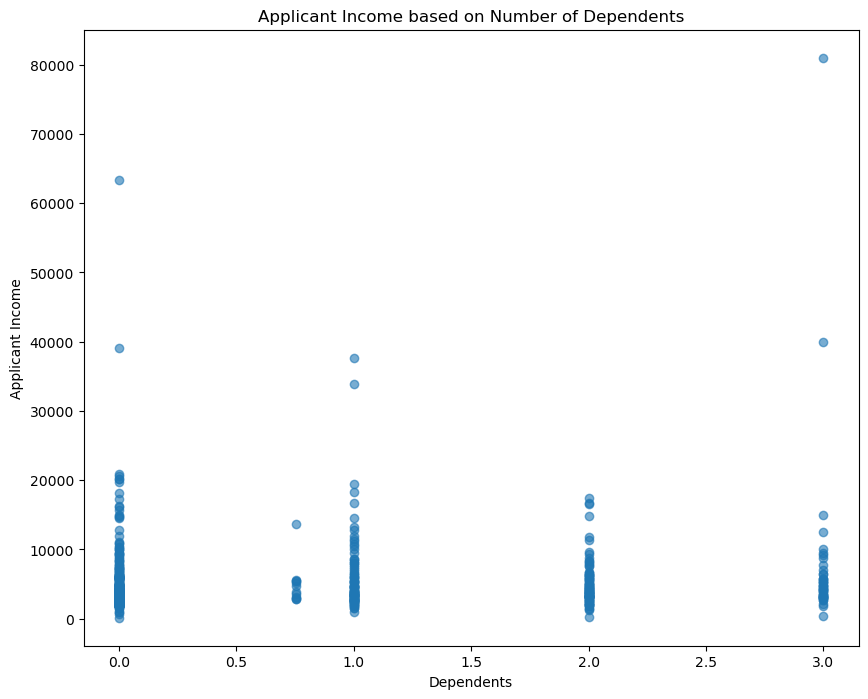

In [147]:
plt.figure(figsize=(10, 8))  # Création d'une figure de taille 8x6 pouces

# Création d'un nuage de points (scatter plot)
plt.scatter(
    data['Dependents'],  # Données pour l'axe des x (Nombre de personnes à charge)
    data['ApplicantIncome'],  # Données pour l'axe des y (Revenu du demandeur)
    alpha=0.6  # Réglage de la transparence des points
)

plt.xlabel('Dependents')  # Étiquette de l'axe x (Nombre de personnes à charge)
plt.ylabel('Applicant Income')  # Étiquette de l'axe y (Revenu du demandeur)
plt.title('Applicant Income based on Number of Dependents')  # Titre du graphique

plt.show()  # Affichage du graphique

##### 6. Le revenu du demandeur en fonction du nombre de crédits antécédents et la localisation :

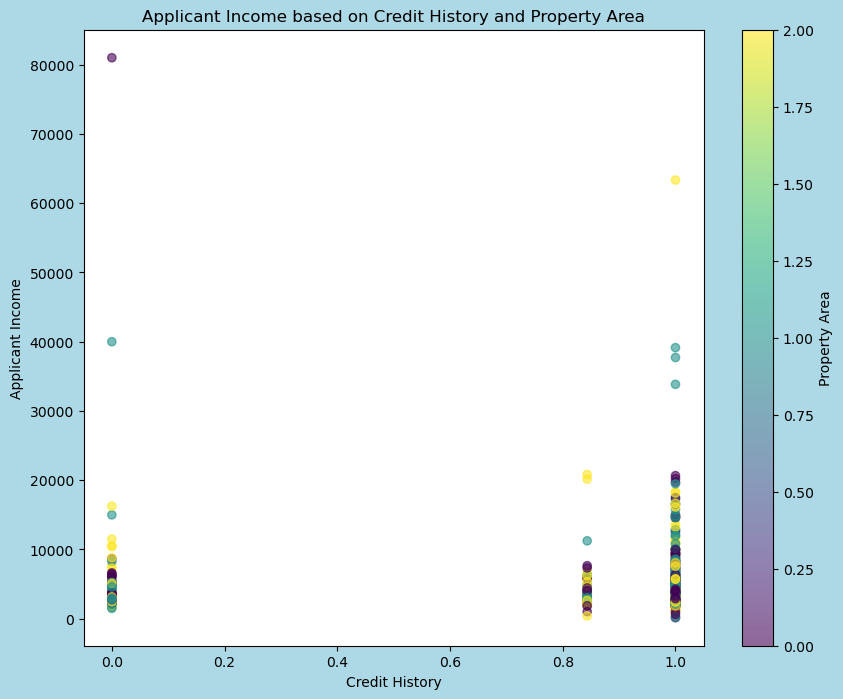

In [148]:
plt.figure(figsize=(10, 8), facecolor='lightblue', alpha=0.6)

# Création d'un nuage de points (scatter plot)
plt.scatter(
    data['Credit_History'],  # Données pour l'axe des x (Historique de crédit)
    data['ApplicantIncome'],  # Données pour l'axe des y (Revenu du demandeur)
    c=data['Property_Area'],  # Couleur basée sur la zone de propriété
    cmap='viridis',  # Utilisation d'une colormap 'viridis'
    alpha=0.6  # Réglage de la transparence des points
)

plt.xlabel('Credit History')  # Étiquette de l'axe x (Historique de crédit)
plt.ylabel('Applicant Income')  # Étiquette de l'axe y (Revenu du demandeur)
plt.title('Applicant Income based on Credit History and Property Area')  # Titre du graphique

plt.colorbar(label='Property Area')  # Ajout d'une barre de couleur indiquant la zone de propriété
plt.show()  # Affichage du graphique

##### 7. Le revenu du demandeur en fonction du niveau d’éducation et du nombre de crédits antécédents :

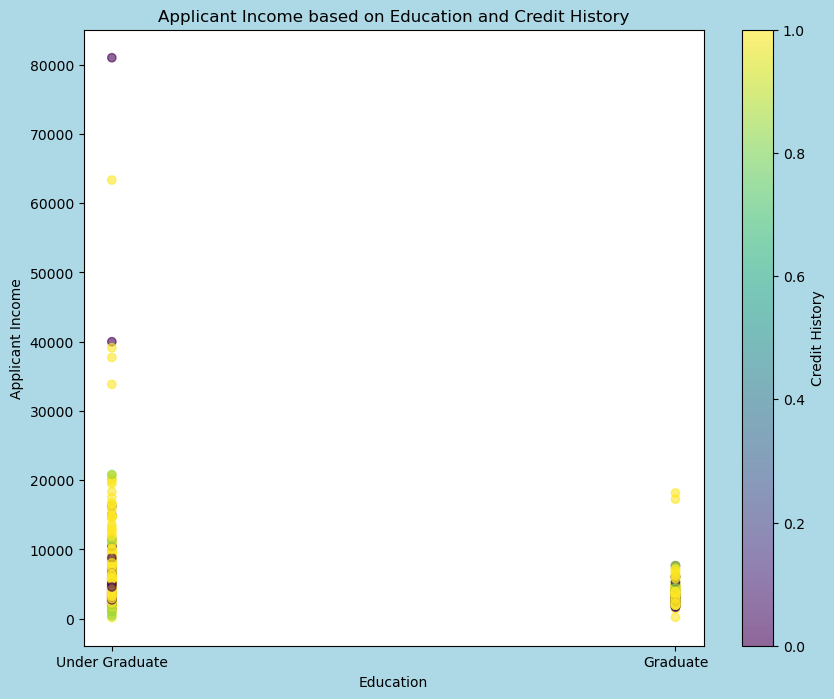

In [149]:
plt.figure(figsize=(10, 8), facecolor='lightblue', alpha=0.6)

# Création d'un nuage de points (scatter plot)
plt.scatter(
    data['Education'],  # Données pour l'axe des x (Niveau d'éducation)
    data['ApplicantIncome'],  # Données pour l'axe des y (Revenu du demandeur)
    c=data['Credit_History'],  # Couleur basée sur l'historique de crédit
    cmap='viridis',  # Utilisation d'une colormap 'viridis'
    alpha=0.6  # Réglage de la transparence des points
)

plt.xlabel('Education')  # Étiquette de l'axe x (Niveau d'éducation)
plt.ylabel('Applicant Income')  # Étiquette de l'axe y (Revenu du demandeur)
plt.title('Applicant Income based on Education and Credit History')  # Titre du graphique

plt.colorbar(label='Credit History')  # Ajout d'une barre de couleur indiquant l'historique de crédit
plt.xticks([0, 1], ['Under Graduate', 'Graduate'])  # Remplacement des marques de l'axe x
plt.show()  # Affichage du graphique

### B. Montrer le montant du prêt en fonction du revenu du demandeur.

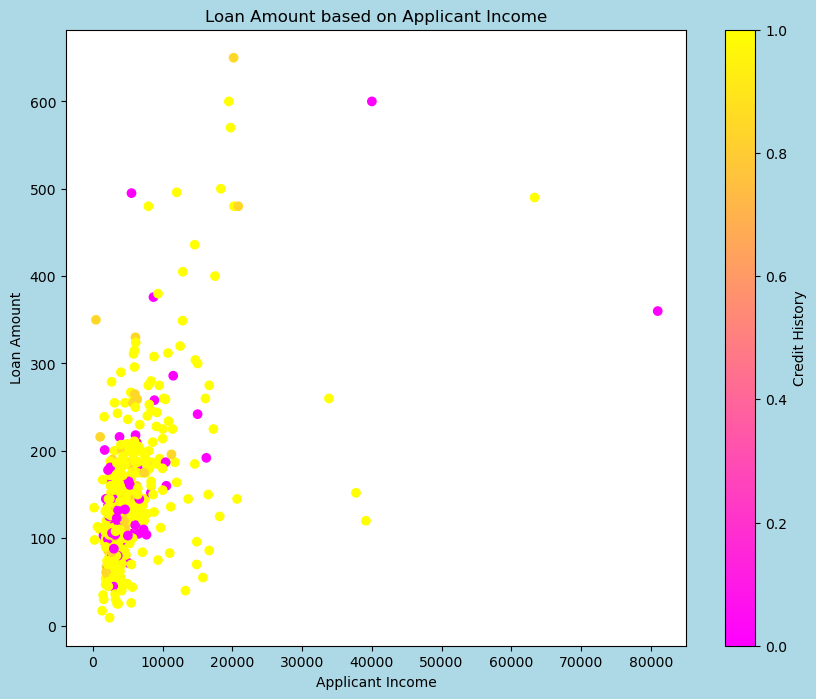

In [150]:
plt.figure(figsize=(10, 8), facecolor='lightblue', alpha=0.6)
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], c=data['Credit_History'], cmap='spring')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount based on Applicant Income')
plt.colorbar(label='Credit History')
plt.show()


### Visualisation de l'arbe de decision:

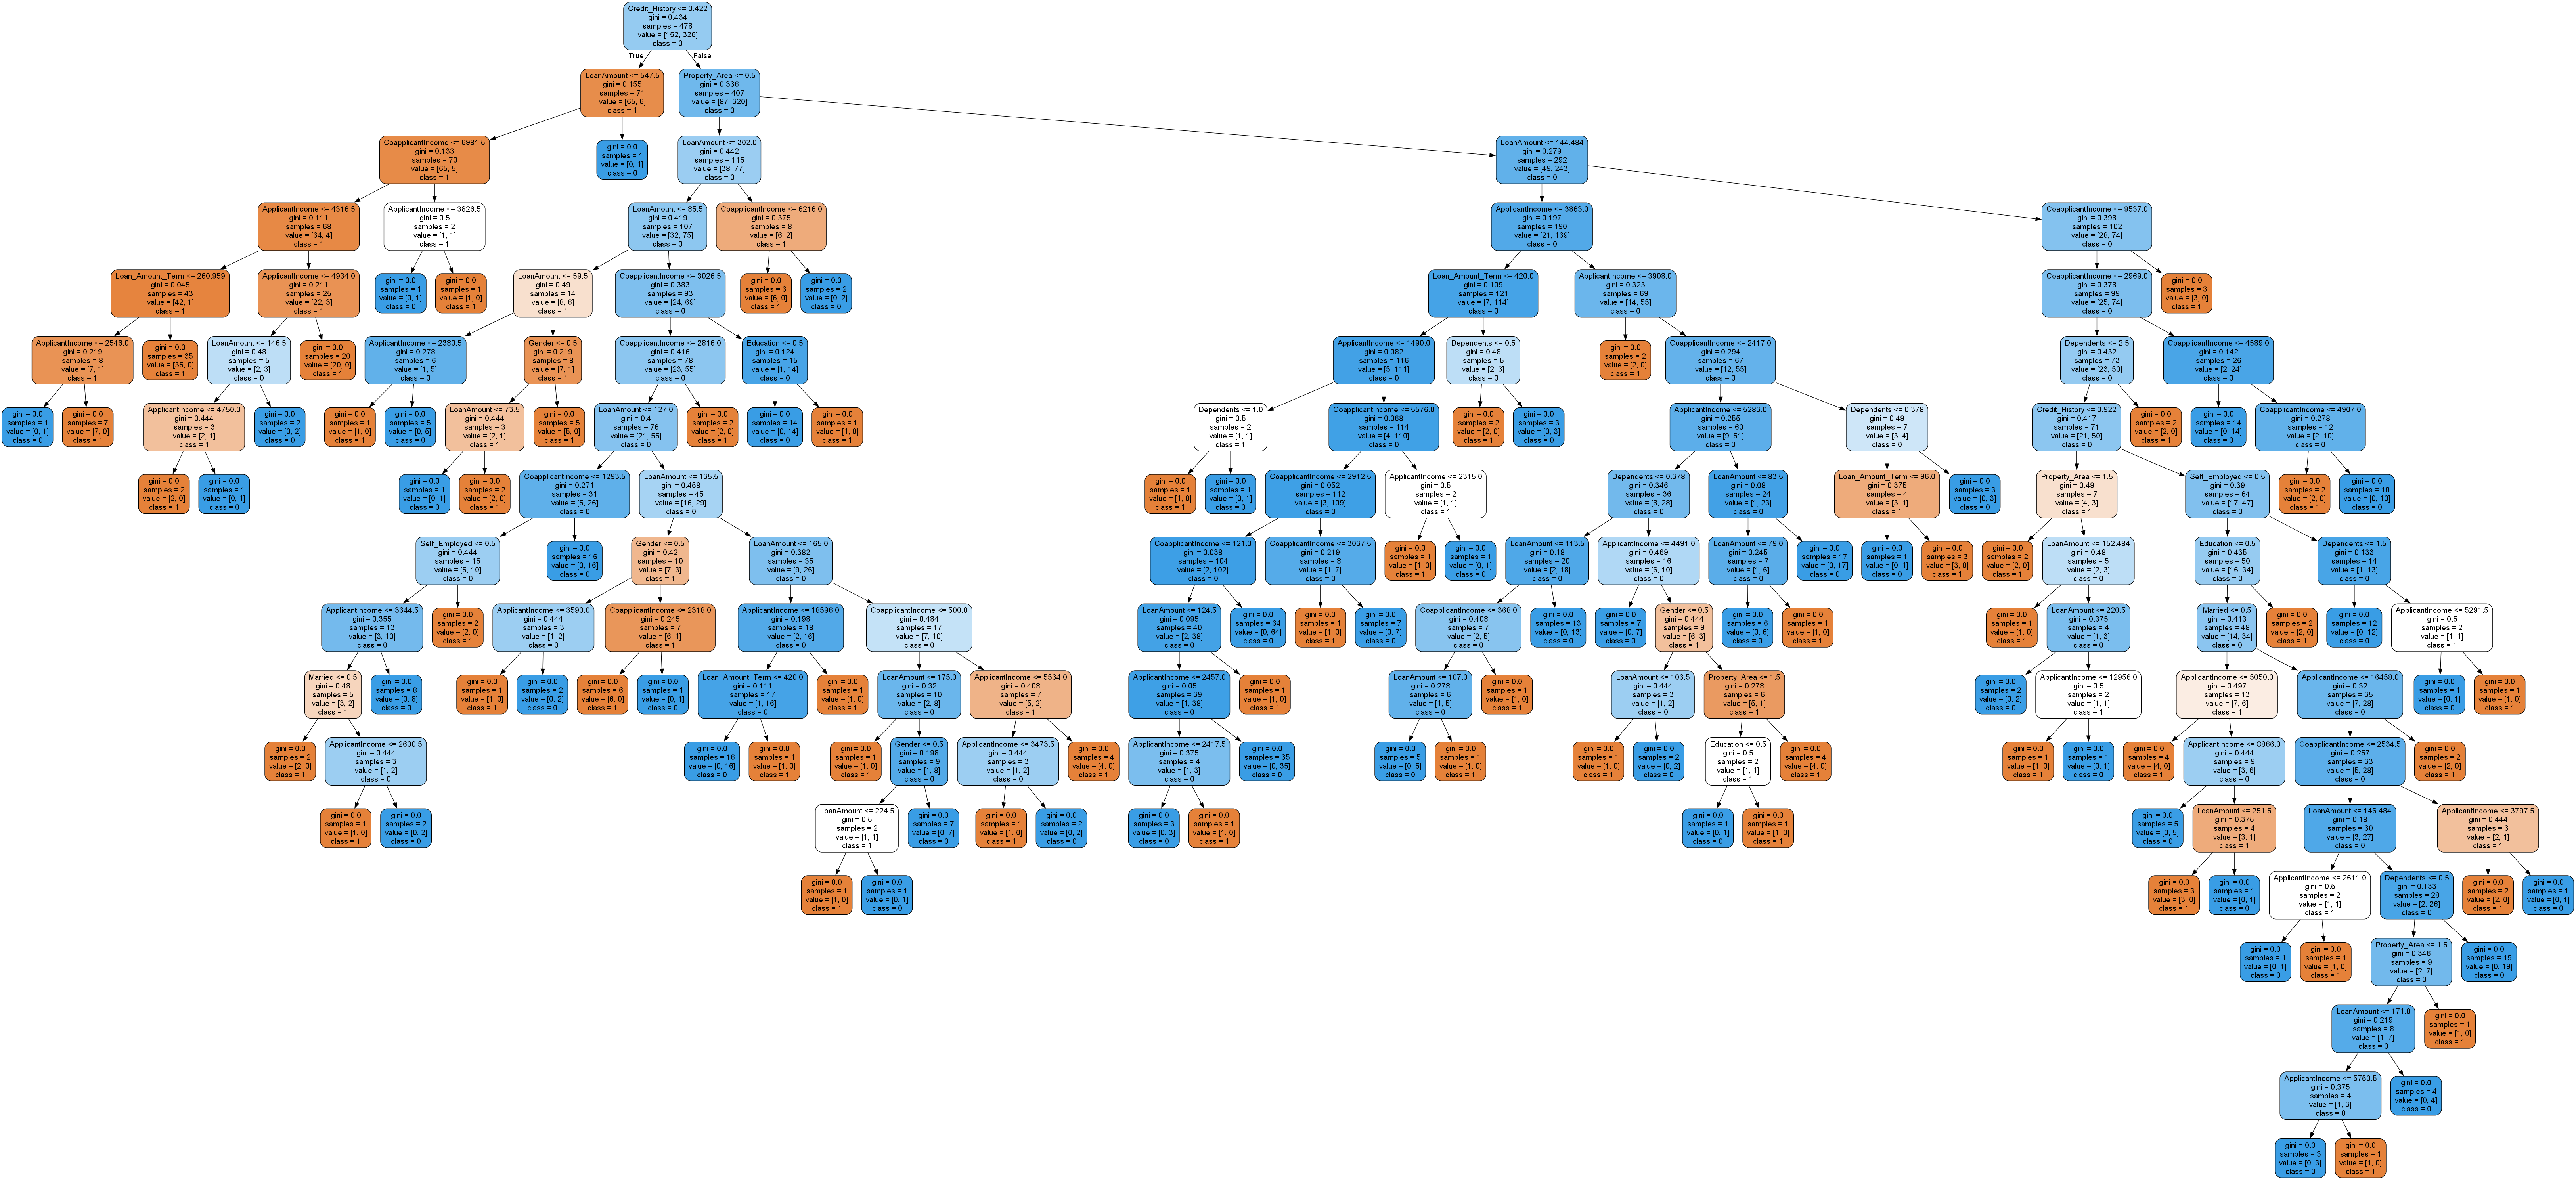

In [151]:
dot_data = export_graphviz(decision_tree=model, feature_names=X.columns,  
                           class_names=y.astype(str).unique(),  
                           filled=True, rounded=True,
                           special_characters=False, fontname='helvetica')

graph = graphviz.Source(dot_data)
Image(graph.pipe(format='png'))